In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
# reading csv file to extract data into numpy array
with open('Medical_data.csv', 'r') as f:
    medical = list(csv.reader(f, delimiter=','))
    med_data = np.array(medical)

# separating feature and label
X = med_data[1:,1:].astype('float')   # feature matrix
y = med_data[1:,0]  # label of input
print (X)
print (y) 

[[ 1.63151556 -0.26444658  2.53456715]
 [ 0.15395105  1.41953348  1.33312079]
 [ 2.02172912  0.26204638  2.87997174]
 ...
 [ 0.19320188  0.36039894  1.86764457]
 [ 1.68409597 -0.0232182   3.30625768]
 [ 0.9752179   2.30595893  0.22982688]]
['HEALTHY' 'SURGERY' 'HEALTHY' ... 'HEALTHY' 'HEALTHY' 'MEDICATION']


In [2]:
classes = ['HEALTHY','SURGERY','MEDICATION']

In [3]:
def multiclassSVM(X,y,g,c):
    f = X.shape[1]
    n = X.shape[0]
    c = len(classes)
    W = np.zeros((c,f))
    b = np.zeros((c))
    clf_arr = []
    classified = np.zeros((3,3000))
    for i in range(c):
        Ty = np.zeros((n))
        for j in range(n):
            if y[j] == classes[i]:
                Ty[j] = 1
            else:
                Ty[j] = -1
        clf = SVC(gamma = g,C = c)
        clf.fit(X, Ty.ravel())
        classified[i] = clf.decision_function(X)
    return (classified.T)

In [4]:
a = np.array(range(1,101))
a = a/100
b = np.array(range(1,100))
c = a.tolist()+b.tolist()
print (c)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [5]:
ACC=[]
cost = 10
for i in range(len(c)):
    classified = multiclassSVM(X,y,c[i],cost)
    acc =0
    for i in range(3000):
        y_predicted = np.where(classified[i] == max(classified[i]))
        #print (y_predicted)
        if(y_predicted[0] == classes.index(y[i])):
            acc += 1
    print (acc/30)
    ACC.append(acc/30)

83.3
85.13333333333334
85.8
86.26666666666667
87.16666666666667
87.43333333333334
87.7
88.0
88.13333333333334
88.23333333333333
88.6
88.76666666666667
89.1
89.06666666666666
89.23333333333333
89.36666666666666
89.43333333333334
89.43333333333334
89.56666666666666
89.66666666666667
89.73333333333333
89.7
89.86666666666666
89.9
90.0
90.13333333333334
90.3
90.26666666666667
90.36666666666666
90.4
90.43333333333334
90.53333333333333
90.6
90.63333333333334
90.56666666666666
90.66666666666667
90.7
90.7
90.76666666666667
90.8
90.76666666666667
90.8
90.76666666666667
90.76666666666667
90.76666666666667
90.8
90.9
90.93333333333334
91.03333333333333
91.1
91.06666666666666
91.06666666666666
91.03333333333333
91.03333333333333
91.0
91.03333333333333
91.06666666666666
91.06666666666666
91.13333333333334
91.16666666666667
91.2
91.26666666666667
91.26666666666667
91.26666666666667
91.26666666666667
91.26666666666667
91.33333333333333
91.33333333333333
91.36666666666666
91.36666666666666
91.4
91.46666

In [6]:
A = ACC
print (A)

[83.3, 85.13333333333334, 85.8, 86.26666666666667, 87.16666666666667, 87.43333333333334, 87.7, 88.0, 88.13333333333334, 88.23333333333333, 88.6, 88.76666666666667, 89.1, 89.06666666666666, 89.23333333333333, 89.36666666666666, 89.43333333333334, 89.43333333333334, 89.56666666666666, 89.66666666666667, 89.73333333333333, 89.7, 89.86666666666666, 89.9, 90.0, 90.13333333333334, 90.3, 90.26666666666667, 90.36666666666666, 90.4, 90.43333333333334, 90.53333333333333, 90.6, 90.63333333333334, 90.56666666666666, 90.66666666666667, 90.7, 90.7, 90.76666666666667, 90.8, 90.76666666666667, 90.8, 90.76666666666667, 90.76666666666667, 90.76666666666667, 90.8, 90.9, 90.93333333333334, 91.03333333333333, 91.1, 91.06666666666666, 91.06666666666666, 91.03333333333333, 91.03333333333333, 91.0, 91.03333333333333, 91.06666666666666, 91.06666666666666, 91.13333333333334, 91.16666666666667, 91.2, 91.26666666666667, 91.26666666666667, 91.26666666666667, 91.26666666666667, 91.26666666666667, 91.33333333333333,

In [7]:
a = list(range(1,101))

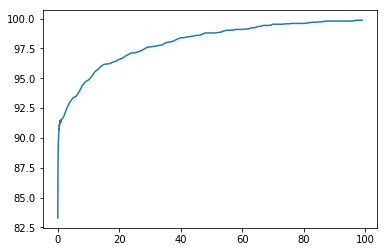

In [8]:
import matplotlib.pyplot as plt
plt.figure('Medical_SVM_gaussian')
plt.plot(c,ACC)
plt.savefig('Medical_SVM_gaussian')

In [5]:

f = X.shape[1]
n = X.shape[0]
c = len(classes)
W = np.zeros((c,f))
b = np.zeros((c))
clf_arr = []
for i in range(c):
    Ty = np.zeros((n))
    for j in range(n):
        if y[j] == classes[i]:
            Ty[j] = 1
        else:
            Ty[j] = -1
    clf = SVC(gamma = 0.01)
    clf.fit(X, Ty.ravel())
    print (clf.decision_function(X))

[ 1.28474825 -1.44064479  1.58789557 ... -0.66235113  1.42023594
 -2.15919419]
[-1.59105309  0.69038954 -1.81915099 ...  0.49929959 -1.24063522
 -0.78548608]
[-2.90243172 -1.29208835 -3.24009586 ... -2.16381006 -3.99235796
  0.63890771]


In [ ]:
def accuracy(X,y,classes):
    c = len(classes)         #number of classes
    n = X.shape[0]           #number of data samples
    f = W.shape[1]           #input dimension
    acc = 0                  #number of correctly classified inputs
    
    # implementing soft-max to calculate predicted class
    g = np.zeros(c)     # probability for each class
    for i in range(n):
        clf_arr.predict(X[i])
        y_predicted = np.where(g == max(g))[0]
        if (y_predicted[0] == classes.index(y[i])):
            acc += 1
    
    return acc/X.shape[0]

In [10]:
acc = accuracy(X,y,classes)*100
print(acc)

33.33333333333333


In [49]:
print (W)

[[ 1.14432574 -0.55590702  0.90819178]
 [-1.62237757  0.28200822  0.44760031]
 [ 0.24087069  0.05919695 -1.63351801]]


In [38]:
acc = accuracy(X,y,W,b,classes)
print (acc*100)

33.33333333333333


In [ ]:
print (W)

In [ ]:
print (b)